In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
from scipy.special import ellipk
xi = lambda t: 2.*np.sinh(0.5/t)/(np.cosh(0.5/t)**2)
E_2D = lambda t: -0.25*(np.cosh(0.5/t)/np.sinh(0.5/t))*(1+2/np.pi*ellipk(xi(t)**2)*(2*np.tanh(0.5/t)**2-1.))
M_2D = np.vectorize(lambda t: 0.5*(1.-1./np.sinh(0.5/t)**4)**0.125 if np.sinh(0.5/t)**4>1. else 0)

In [3]:
def generate_mean_data(path, n_max=0, Nsteps=91):
    Size_Folders = np.array(glob.glob(path+"L*"))
    Size_Folders = Size_Folders[np.argsort([int(s.split("L")[-1]) for s in Size_Folders])]
    if n_max==0:
        n_max = len(Size_Folders)
    print(Size_Folders[:n_max])
    for folder_size in Size_Folders[:n_max]:
        Temperatures, Energies, Magnetizations, Cvs, Cms = [], [], [], [], []
        L_folders = np.sort(glob.glob(folder_size+"/Ising*"))
        for l_folder in L_folders:
            data = pd.read_csv(l_folder+"/DATA/data.csv")
            data = data.sort_values(by='Temperature')
            if len(data)!=Nsteps:
                print(l_folder, len(data))
                break
            Temperatures.append(data.Temperature.values.astype('float64'))
            Energies.append(data.Energy.values.astype('float64'))
            Magnetizations.append(data.Magnetization.values.astype('float64'))
            Cvs.append(data.Cv.values.astype('float64'))
            Cms.append(data.Chi_m.values.astype('float64'))

        T_means  = np.mean(Temperatures, axis=0)
        E_means  = np.mean(Energies, axis=0)
        M_means  = np.mean(Magnetizations, axis=0)
        Cv_means = np.mean(Cvs, axis=0)
        Cm_means = np.mean(Cms, axis=0)

        df = pd.DataFrame(data=np.array([T_means, E_means, M_means, Cv_means, Cm_means]).transpose(),
                          columns=['Temperature', 'Energy', 'Magnetization', 'Cv', 'Chi_m'])
        df.to_csv(folder_size+"/data_mean.csv")

        T_std  = np.std(Temperatures, axis=0)
        E_std  = np.std(Energies, axis=0)
        M_std  = np.std(Magnetizations, axis=0)
        Cv_std = np.std(Cvs, axis=0)
        Cm_std = np.std(Cms, axis=0)

        df = pd.DataFrame(data=np.array([T_std, E_std, M_std, Cv_std, Cm_std]).transpose(),
                          columns=['Temperature', 'Energy', 'Magnetization', 'Cv', 'Chi_m'])
        df.to_csv(folder_size+"/data_std.csv")

def plot_variables(path, n_max=0):
    Size_Folders = np.array(glob.glob(path+"L*"))
    Size_Folders = Size_Folders[np.argsort([int(s.split("L")[-1]) for s in Size_Folders])]
    if n_max==0:
        n_max = len(Size_Folders)
    print(Size_Folders[:n_max])
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
    for i in range(len(Size_Folders))[:n_max]:
        mean_data = data = pd.read_csv(Size_Folders[i]+"/data_mean.csv")
        std_data = data = pd.read_csv(Size_Folders[i]+"/data_std.csv")
        
        ax[0,0].plot(mean_data.Temperature.values, mean_data.Energy.values, color='C'+str(i))
        ax[0,0].fill_between(x=mean_data.Temperature.values, 
                             y1=mean_data.Energy.values-std_data.Energy.values, 
                             y2=mean_data.Energy.values+std_data.Energy.values,
                             color='C'+str(i), alpha=0.5, label=Size_Folders[i].split('/')[-1])
        
        ax[0,1].plot(mean_data.Temperature.values, mean_data.Magnetization.values, color='C'+str(i))
        ax[0,1].fill_between(x=mean_data.Temperature.values, 
                             y1=mean_data.Magnetization.values-std_data.Magnetization.values, 
                             y2=mean_data.Magnetization.values+std_data.Magnetization.values,
                             color='C'+str(i), alpha=0.5, label=Size_Folders[i].split('/')[-1])
        
        ax[1,0].plot(mean_data.Temperature.values, mean_data.Cv.values, color='C'+str(i))
        ax[1,0].fill_between(x=mean_data.Temperature.values, 
                             y1=mean_data.Cv.values-std_data.Cv.values, 
                             y2=mean_data.Cv.values+std_data.Cv.values,
                             color='C'+str(i), alpha=0.5, label=Size_Folders[i].split('/')[-1])
        
        ax[1,1].plot(mean_data.Temperature.values, mean_data.Chi_m.values, color='C'+str(i))
        ax[1,1].fill_between(x=mean_data.Temperature.values, 
                             y1=mean_data.Chi_m.values-std_data.Chi_m.values, 
                             y2=mean_data.Chi_m.values+std_data.Chi_m.values,
                             color='C'+str(i), alpha=0.5, label=Size_Folders[i].split('/')[-1])

    ax[0,0].plot(mean_data.Temperature.values, E_2D(mean_data.Temperature.values), 'k')
    ax[0,1].plot(mean_data.Temperature.values, M_2D(mean_data.Temperature.values), 'k')
    
    ax[1,0].set_yscale('log')
    ax[1,1].set_yscale('log')
    Labels = [["$E$", "$M$"], ["$Log\ (C_v)$", "$Log\ (\chi_m)$"]]
    for i in range(2):
        for j in range(2):
            ax[i,j].set_xlabel("T/4J", fontsize=15)
            ax[i,j].set_ylabel(Labels[i][j], fontsize=15)
            ax[i,j].grid()
            ax[i,j].legend(fontsize=15)
    
    plt.tight_layout()
    plt.savefig(path+"Data_Analysis.png", dpi=150)

['DATA/L8' 'DATA/L16' 'DATA/L32' 'DATA/L64' 'DATA/L128']
DATA/L8/Ising_S0.5_J1.0_H0.0_MC10000_Ti0.1_Tf1.0__18 90
DATA/L16/Ising_S0.5_J1.0_H0.0_MC10000_Ti0.1_Tf1.0__17 90
DATA/L32/Ising_S0.5_J1.0_H0.0_MC10000_Ti0.1_Tf1.0__18 90
['DATA/L8' 'DATA/L16' 'DATA/L32' 'DATA/L64' 'DATA/L128']


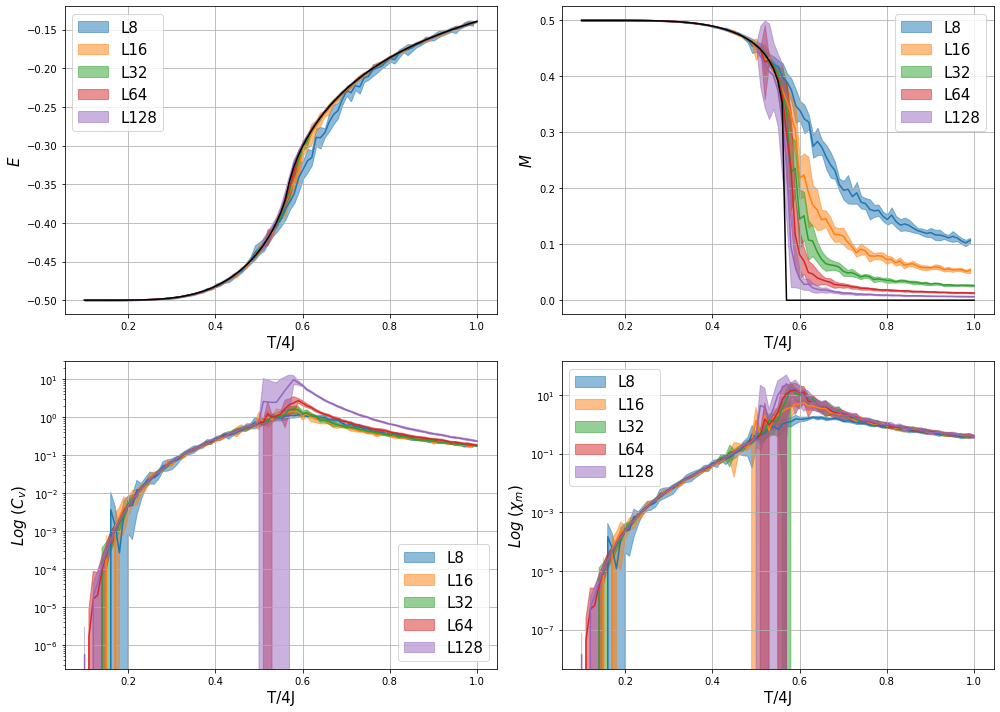

In [4]:
generate_mean_data('DATA/', Nsteps=91)
plot_variables('DATA/')

['DATA_Control/L8' 'DATA_Control/L16' 'DATA_Control/L32'
 'DATA_Control/L64' 'DATA_Control/L128']
['DATA_Control/L8' 'DATA_Control/L16' 'DATA_Control/L32'
 'DATA_Control/L64' 'DATA_Control/L128']


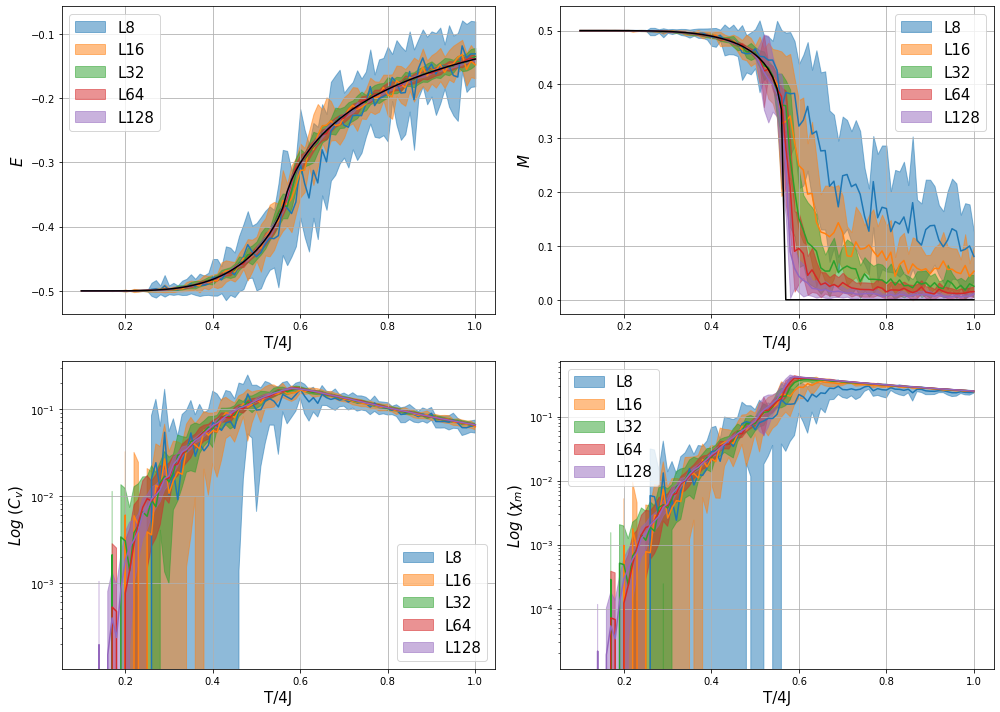

In [5]:
generate_mean_data('DATA_Control/', Nsteps=91)
plot_variables('DATA_Control/')

['DATA_Random/L8' 'DATA_Random/L16' 'DATA_Random/L32' 'DATA_Random/L64'
 'DATA_Random/L128']
['DATA_Random/L8' 'DATA_Random/L16' 'DATA_Random/L32' 'DATA_Random/L64'
 'DATA_Random/L128']


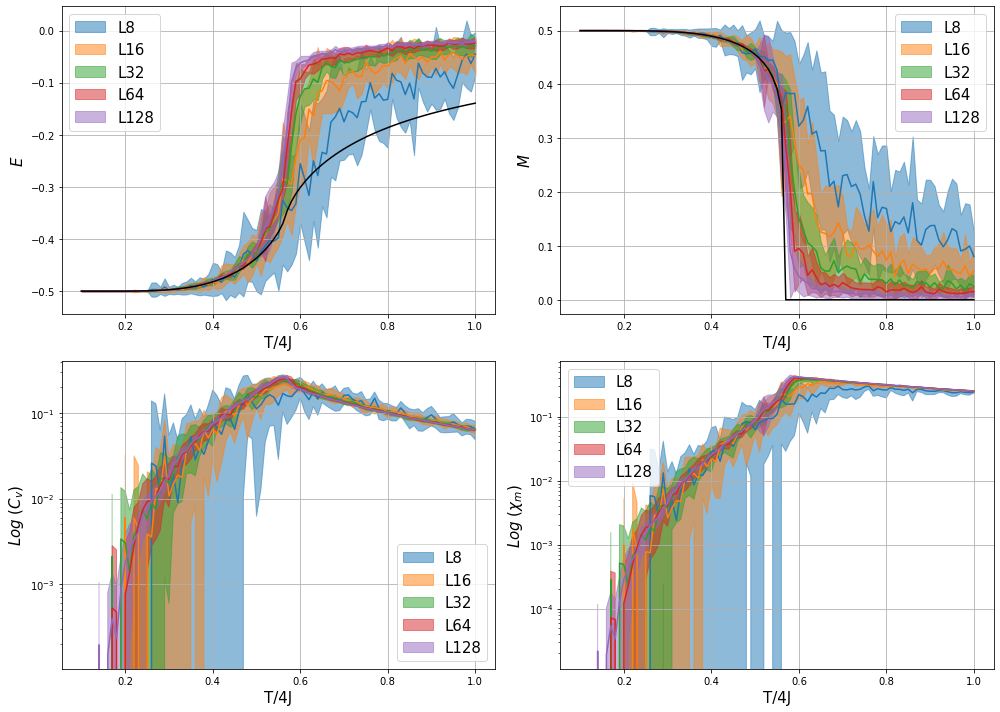

In [6]:
generate_mean_data('DATA_Random/', Nsteps=91)
plot_variables('DATA_Random/')